In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' 'NAME' 'SPECIAL_CONSIDERATIONS', and 'STATUS'.
application_df = application_df.drop(['EIN', 'NAME', 'AFFILIATION', 'SPECIAL_CONSIDERATIONS', 'ORGANIZATION'], axis=1)
application_df.head()

,APPLICATION_TYPE,CLASSIFICATION,USE_CASE,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,C1000,ProductDev,1,0,5000,1
1,T3,C2000,Preservation,1,1-9999,108590,1
2,T5,C3000,ProductDev,1,0,5000,0
3,T3,C2000,Preservation,1,10000-24999,6692,1
4,T3,C1000,Heathcare,1,100000-499999,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique(axis=0)

APPLICATION_TYPE      17
CLASSIFICATION        71
USE_CASE               5
STATUS                 2
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
APP_count = application_df['APPLICATION_TYPE'].value_counts()
APP_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(APP_count[APP_count<100].index)
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [6]:
CLASSIFICATION_counts = application_df['CLASSIFICATION'].value_counts()
CLASSIFICATION_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [7]:
helpful_CLASSIFICATION_counts = application_df['CLASSIFICATION'].value_counts().loc[lambda x : x>2]
helpful_CLASSIFICATION_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
Name: CLASSIFICATION, dtype: int64

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(CLASSIFICATION_counts[CLASSIFICATION_counts<2000].index)
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# # Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
Other     6062
C1200     4837
Name: CLASSIFICATION, dtype: int64

In [9]:
data_dummies = pd.get_dummies(application_df)
data_dummies.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,USE_CASE_ProductDev,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,5000,1,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,1,108590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,5000,0,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [10]:
# Split our preprocessed data into our features and target arrays
y = data_dummies['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X = data_dummies.drop(['IS_SUCCESSFUL'],axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2000)

In [11]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [12]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_of_features = len(X_train_scaled[0])
dense = 80
dense_1 = 30
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=dense, input_dim= number_of_features, activation='relu'))
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=dense_1, activation='relu'))
# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                2480      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 4,941
Trainable params: 4,941
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=200)

Epoch 1/200
804/804 [==============================] - 1s 786us/step - loss: 0.6570 - accuracy: 0.5960
Epoch 2/200
804/804 [==============================] - 1s 785us/step - loss: 0.6513 - accuracy: 0.6003
Epoch 3/200
804/804 [==============================] - 1s 791us/step - loss: 0.6496 - accuracy: 0.6016
Epoch 4/200
804/804 [==============================] - 1s 768us/step - loss: 0.6488 - accuracy: 0.6035
Epoch 5/200
804/804 [==============================] - 1s 766us/step - loss: 0.6485 - accuracy: 0.6036
Epoch 6/200
804/804 [==============================] - 1s 751us/step - loss: 0.6480 - accuracy: 0.6039
Epoch 7/200
804/804 [==============================] - 1s 756us/step - loss: 0.6473 - accuracy: 0.6034
Epoch 8/200
804/804 [==============================] - 1s 772us/step - loss: 0.6471 - accuracy: 0.6029
Epoch 9/200
804/804 [==============================] - 1s 767us/step - loss: 0.6469 - accuracy: 0.6029
Epoch 10/200
804/804 [==============================] - 1s 761us/step - l

804/804 [==============================] - 1s 890us/step - loss: 0.6427 - accuracy: 0.6078
Epoch 80/200
804/804 [==============================] - 1s 864us/step - loss: 0.6425 - accuracy: 0.6071
Epoch 81/200
804/804 [==============================] - 1s 824us/step - loss: 0.6423 - accuracy: 0.6086
Epoch 82/200
804/804 [==============================] - 1s 827us/step - loss: 0.6425 - accuracy: 0.6089
Epoch 83/200
804/804 [==============================] - 1s 864us/step - loss: 0.6426 - accuracy: 0.6090
Epoch 84/200
804/804 [==============================] - 1s 842us/step - loss: 0.6426 - accuracy: 0.6080
Epoch 85/200
804/804 [==============================] - 1s 826us/step - loss: 0.6422 - accuracy: 0.6095
Epoch 86/200
804/804 [==============================] - 1s 827us/step - loss: 0.6421 - accuracy: 0.6081
Epoch 87/200
804/804 [==============================] - 1s 806us/step - loss: 0.6425 - accuracy: 0.6085
Epoch 88/200
804/804 [==============================] - 1s 869us/step - loss:

804/804 [==============================] - 1s 853us/step - loss: 0.6414 - accuracy: 0.6082
Epoch 158/200
804/804 [==============================] - 1s 847us/step - loss: 0.6415 - accuracy: 0.6090
Epoch 159/200
804/804 [==============================] - 1s 869us/step - loss: 0.6413 - accuracy: 0.6079
Epoch 160/200
804/804 [==============================] - 1s 847us/step - loss: 0.6416 - accuracy: 0.6081
Epoch 161/200
804/804 [==============================] - 1s 914us/step - loss: 0.6417 - accuracy: 0.6094
Epoch 162/200
804/804 [==============================] - 1s 888us/step - loss: 0.6415 - accuracy: 0.6101
Epoch 163/200
804/804 [==============================] - 1s 860us/step - loss: 0.6415 - accuracy: 0.6073
Epoch 164/200
804/804 [==============================] - 1s 884us/step - loss: 0.6415 - accuracy: 0.6066
Epoch 165/200
804/804 [==============================] - 1s 910us/step - loss: 0.6419 - accuracy: 0.6077
Epoch 166/200
804/804 [==============================] - 1s 856us/ste

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.6565 - accuracy: 0.6054 - 599ms/epoch - 2ms/step
Loss: 0.6564850211143494, Accuracy: 0.6053644418716431


In [20]:
# Export our model to HDF5 file
nn.save("./Resources/AlphabetSoupCharity_Optimization_1.h5")

<AxesSubplot:>

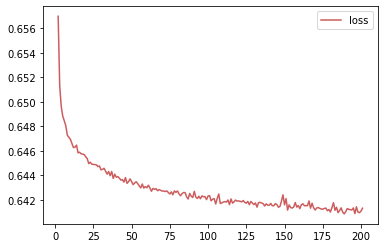

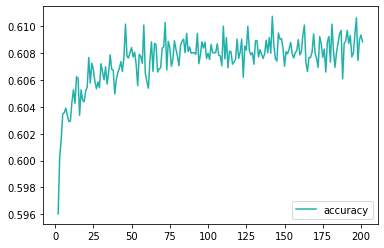

In [21]:
Report_1_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
Report_1_df.index += 2

# Plot the loss
Report_1_df.plot(y="loss", color='indianred')
Report_1_df.plot(y="accuracy", color='lightseagreen')